In [27]:
import math
import networkx as nx
import matplotlib.pyplot as plt


In [28]:
L=nx.read_gml('polbooks.gml',relabel=True)
L

In [29]:
print "Nodes:", L.number_of_nodes()
print "Edges:", L.number_of_edges()

Nodes: 105
Edges: 441


#### With 77 nodes and 254 edges, lets draw a network grapgh using spring layout 

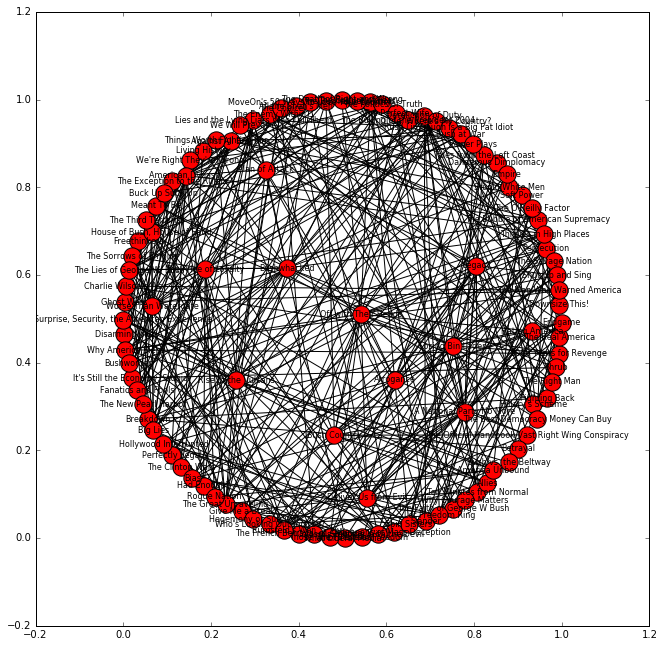

In [30]:
%matplotlib inline
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
pos = nx.spring_layout(L,scale=1.0,k=5*default_distance_between_nodes)
nx.draw_networkx(L,pos, node_size=300, font_size=8)


#### With all the edges and nodes the network graph looks really complicated, 

In [31]:
M = nx.betweenness_centrality(L)
SL = M.items()
SL.sort(key=lambda x:x[1],reverse=True)
top_chars = SL[:10]
SL

[(u'The Price of Loyalty', 0.13947827864287202),
 (u'The Bushes', 0.10364920953531939),
 (u'Bush Country', 0.0983949072276391),
 (u'Off with Their Heads', 0.09526168061799924),
 (u'American Dynasty', 0.09093422527408514),
 (u'Plan of Attack', 0.08030200829197108),
 (u'Losing Bin Laden', 0.07609290805120639),
 (u'Rise of the Vulcans', 0.07527175636235366),
 (u'A National Party No More', 0.0749076042480461),
 (u'Ghost Wars', 0.06872446488084949),
 (u'The Great Unraveling', 0.06521416418686965),
 (u'Sleeping With the Devil', 0.06292846885423589),
 (u"Rumsfeld's War", 0.058842720843820556),
 (u'Bushwhacked', 0.05789950024330003),
 (u'Why America Slept', 0.0562973388998594),
 (u'Why Courage Matters', 0.0547032868746066),
 (u'Deliver Us from Evil', 0.04623512504605777),
 (u'Big Lies', 0.043197926647700245),
 (u'Power Plays', 0.042745761504470674),
 (u'Buck Up Suck Up', 0.040995013862549966),
 (u'Bush at War', 0.04086618510361619),
 (u"Dude, Where's My Country?", 0.03970085860364793),
 (u'Aga

In [32]:
top_chars

[(u'The Price of Loyalty', 0.13947827864287202),
 (u'The Bushes', 0.10364920953531939),
 (u'Bush Country', 0.0983949072276391),
 (u'Off with Their Heads', 0.09526168061799924),
 (u'American Dynasty', 0.09093422527408514),
 (u'Plan of Attack', 0.08030200829197108),
 (u'Losing Bin Laden', 0.07609290805120639),
 (u'Rise of the Vulcans', 0.07527175636235366),
 (u'A National Party No More', 0.0749076042480461),
 (u'Ghost Wars', 0.06872446488084949)]

#### Now we have top 10 books and we can easily draw a network grapgh of these books, 

In [33]:
new_labels = dict((k,k) for (k,v) in top_chars)
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))

In [34]:
new_labels

{u'A National Party No More': u'A National Party No More',
 u'American Dynasty': u'American Dynasty',
 u'Bush Country': u'Bush Country',
 u'Ghost Wars': u'Ghost Wars',
 u'Losing Bin Laden': u'Losing Bin Laden',
 u'Off with Their Heads': u'Off with Their Heads',
 u'Plan of Attack': u'Plan of Attack',
 u'Rise of the Vulcans': u'Rise of the Vulcans',
 u'The Bushes': u'The Bushes',
 u'The Price of Loyalty': u'The Price of Loyalty'}

#### It's interesting to found that when we tried creating new labels for the top 10 books they are showing here as connected to themselves, lets see how it will look like when we see the complete graph of all top 10 books connected with others.

{u'A National Party No More': <matplotlib.text.Text at 0xd620550>,
 u'American Dynasty': <matplotlib.text.Text at 0xd62f4a8>,
 u'Bush Country': <matplotlib.text.Text at 0xd6154a8>,
 u'Ghost Wars': <matplotlib.text.Text at 0xd62fc18>,
 u'Losing Bin Laden': <matplotlib.text.Text at 0xd62ffd0>,
 u'Off with Their Heads': <matplotlib.text.Text at 0xd620940>,
 u'Plan of Attack': <matplotlib.text.Text at 0xd6813c8>,
 u'Rise of the Vulcans': <matplotlib.text.Text at 0xd62f860>,
 u'The Bushes': <matplotlib.text.Text at 0xd62f0f0>,
 u'The Price of Loyalty': <matplotlib.text.Text at 0xd620cf8>}

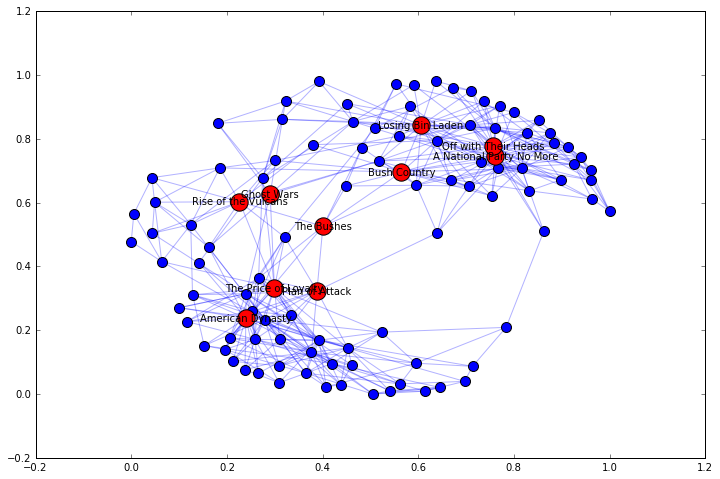

In [35]:
%matplotlib inline
plt.figure(figsize=(12,8))
pos = nx.spring_layout(L,scale=1.0)
default_distance_between_nodes = 1.0/(math.sqrt(len(L.nodes())))
nx.draw_networkx_edges(L,pos, edge_color='blue',alpha=.3)  
nx.draw_networkx_nodes(L,pos,node_color='blue',node_size=100)
nx.draw_networkx_nodes(L,pos,new_labels,node_color='red',node_size=300)
nx.draw_networkx_labels(L,pos,new_labels,font_size=10,font_color='black')

#### With this new visualization 

In [36]:
from networkx import algorithms
algorithms.average_shortest_path_length(L)

3.078754578754579